<a href="https://colab.research.google.com/github/novoforce/Exploring-Tensorflow/blob/main/Edurekha_tf_course/Assignment_3_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Model
import matplotlib.pyplot as plt


print(tf.__version__)

2.6.0


# Data Exploration

In [ ]:
(x_train,y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Shape of the datasets:> ",x_train.shape,x_test.shape)

Shape of the datasets:>  (60000, 28, 28) (10000, 28, 28)


In [ ]:
from collections import Counter
items_train = Counter(y_train).keys()
items_test = Counter(y_test).keys()
print("No of unique items in the dataset are:", len(items_train),len(items_test))

No of unique items in the dataset are: 10 10


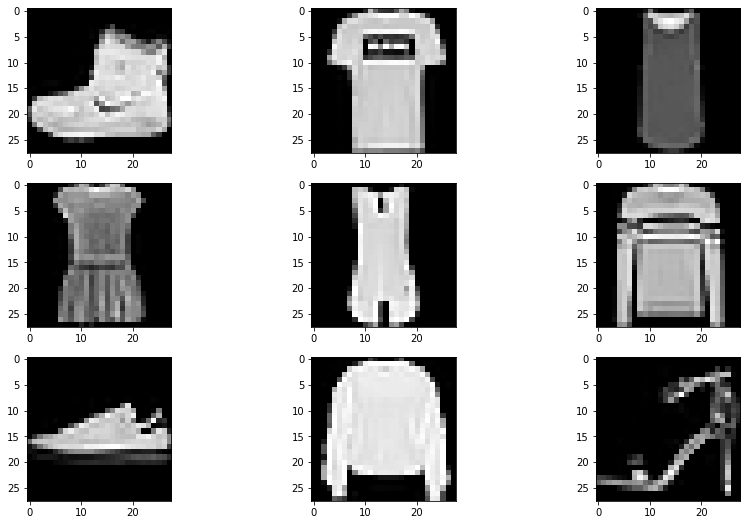

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    plt.imshow(x_train[i], cmap="gray") #'image_list' is the list of images
plt.tight_layout()
plt.show()

# Data Pre-processing:

In [ ]:
#Normalize the dataset between 0 & 1
x_train= x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255

In [ ]:
#Adding Salt and Pepper noise in the images
import numpy as np
from skimage.util import random_noise

for i in range(len(x_train)):
    x_train[i]= random_noise(x_train[i],mode='gaussian',var=0.01) #salt and pepper noise

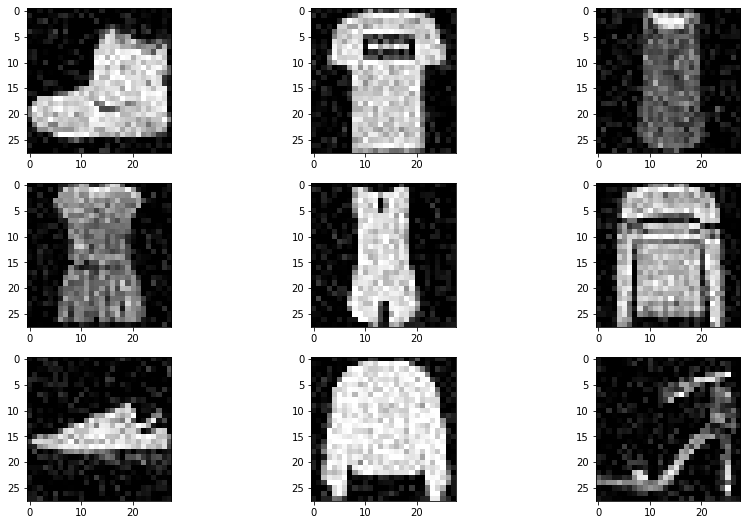

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    plt.imshow(x_train[i], cmap="gray") #'image_list' is the list of images
plt.tight_layout()
plt.show()

In [ ]:
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Autoencoder

In [ ]:
# 784-> 32-> 784
encoding_dim= 32  # compress the image to the factor of 784/32 == 24.5
input_img= Input(shape=(784,))
encoded= Dense(encoding_dim,activation="relu")(input_img) #encoded representation
decoded= Dense(784,activation="sigmoid")(encoded) #reconstruction from the encoded form

#The reason behind usage of sigmoid is so as to get the image in the range of 0-1(normalized)
auto_encoder= Model(input_img,decoded)

auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder= Model(input_img,encoded)
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Build decoder
encoded_input= Input(shape=(encoding_dim,)) # flexibility of giving our own input
decoder_layer= auto_encoder.layers[-1] (encoded_input) #retreiving the last layer of the autoencoder(to keep the trained weights)
decoder= Model(encoded_input,decoder_layer)

decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
auto_encoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history= auto_encoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3679 - accuracy: 0.0192 - val_loss: 0.3022 - val_accuracy: 0.0206
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.0196 - val_loss: 0.3023 - val_accuracy: 0.0208
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3674 - accuracy: 0.0194 - val_loss: 0.3016 - val_accuracy: 0.0201
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.0197 - val_loss: 0.3003 - val_accuracy: 0.0215
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3668 - accuracy: 0.0197 - val_loss: 0.3011 - val_accuracy: 0.0213
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3666 - accuracy: 0.0196 - val_loss: 0.3000 - val_accuracy: 0.0220
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3665 - accuracy: 0.0201 - val_loss: 0.2995 - val_accuracy: 0.0209
Epoch 

# Evaluating the model performance

In [ ]:
encoded_img= encoder.predict(x_test)
decoded_img= decoder.predict(encoded_img)

# Visualize the trained model output

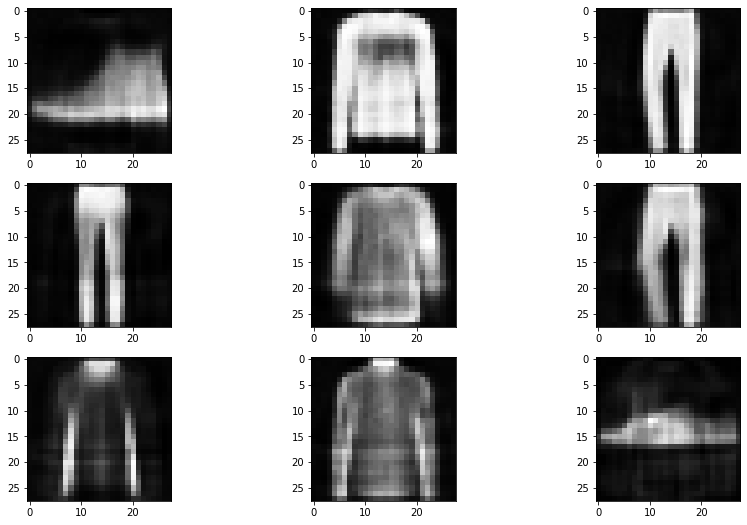

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    plt.imshow(decoded_img[i].reshape(28,28), cmap="gray") #'image_list' is the list of images
    # plt.xlabel(CLASSES[labels[i]]) # 'labels' is the list of labels
plt.tight_layout()
plt.show()

# Performance metrics plotting

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


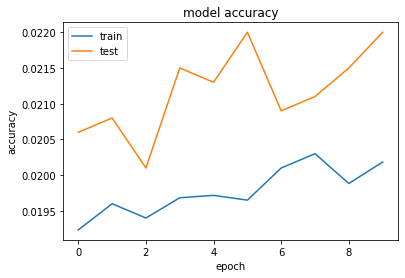

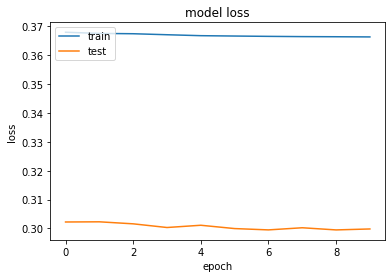

In [ ]:
# summarize training for accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])   # training is the variable from the fit method
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summary

In this project we created an Auto-encoder which de-noises the image from Fashion-MNIST dataset. 

**Architectural design**

An auto-encoder consists of a Encoder and a Decoder model combined together to form a Auto-encoder.

As the name suggests:

Encoder will encode the image/data and the decoder will decode(reconstructs) the image/data.

Main point to note is that it's an Unsupervised way of training the model. So here in this experiment setting the (X,Y) both are the images.

**Experiment design**

**Encoder**

We have designed an Encoder with layers as:

784 --> 32

Here a 28x28(784 vector) image is scaled down to mare 32 vector representation.
This compression forces the neural network to virtually discard the noise and only learn the important representation.

**Decoder**

32 --> 784

Here the 32 vector is scaled up to the actual 784 vector representation.
This de-compression forces the neural network to re-construct the image back.
Since the compressed representation does not contain the noise, So the de-compressed representation will not contain the noise.

Thus achieving the de-noising capability.
